In [226]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [248]:
def Michaelis(t, y, k1, km1, k2):
    es, s, e, p  = y
    desdt = (k1 * e * s) - (km1 * es) - (k2 * es)
    dsdt = (km1 * es) - (k1 * e * s)
    dedt = (km1 * es) + (k2 * es) - (k1 * e * s)
    dpdt = k2 * es
    return desdt, dsdt, dedt, dpdt

ES0 = 0
S0 = 1
E0 = 0.5
P0 = 0

k1 = 0.4 # forwards reaction rate
km1 = 0.001 # backwards reaction step
k2 = 0.4 # catalysis reaction step
t_span = (0, 24)

solution = solve_ivp(Michaelis, t_span, [ES0, S0, E0, P0], args=(k1, km1, k2))

t = solution.t
ES = solution.y[0]
S = solution.y[1]
E = solution.y[2]
P = solution.y[3]

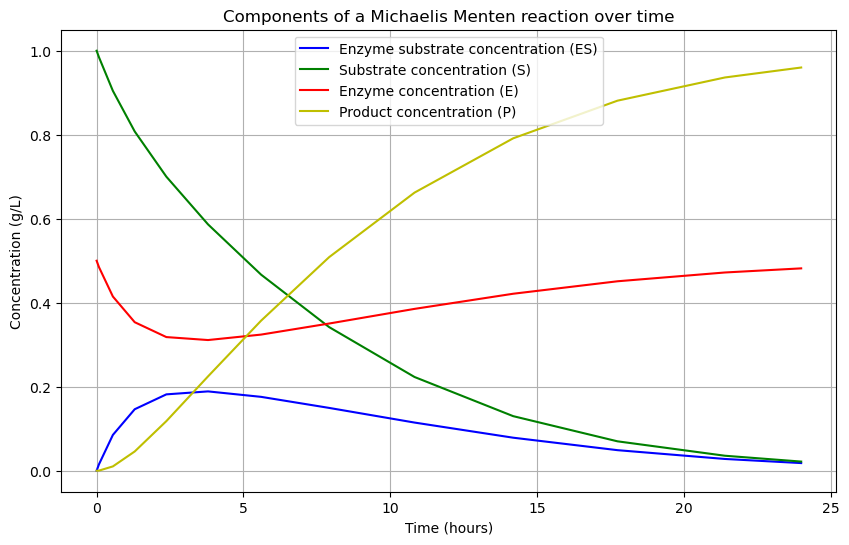

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(t, ES, label='Enzyme substrate concentration (ES)', color='b')
plt.plot(t, S, label='Substrate concentration (S)', color='g')
plt.plot(t, E, label='Enzyme concentration (E)', color='r')
plt.plot(t, P, label='Product concentration (P)', color='y')

plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Components of a Michaelis Menten reaction over time')
plt.grid(True)
plt.show()